# A: sample distribution and sampling distribution

## Um pesquisador está avaliando a qualidade visual de diferentes gráficos gerados por uma meta-heurística. Os valores da métrica de qualidade seguem uma distribuição normal com média de 0.7 e desvio padrão de 0.1.

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

np.random.seed(42)

# Criando uma POPULAÇÃO ARTIFICIAL com distribuição Gaussiana
media = 0.7
desvio_p = 0.1
populacao = np.random.normal(loc=media, scale=desvio_p, size=100000)

In [63]:
# Função para plotar histograma
def plot_hist(data, titulo, cor):
    count, bins, _ = plt.hist(data, bins=30, density=True, alpha=0.6, color=cor, edgecolor='black')

    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    pdf = norm.pdf(x, np.mean(data), np.std(data))
    plt.plot(x, pdf, 'k', linewidth=2)
    plt.title(titulo)
    plt.xlabel('Valor')
    plt.ylabel('Densidade')

In [64]:
#Tirando uma única AMOSTRA (sample distribution) com tamnaho 100
amostra = np.random.choice(populacao, size=100, replace=False)

In [65]:
# Criando uma DISTRIBUIÇÃO AMOSTRAL da MÉDIA (sampling distribution)
n_amostras = 1000
tamanho_amostra = 100
medias_amostras = []

for _ in range(n_amostras):
    amostra_temp = np.random.choice(populacao, size=tamanho_amostra, replace=False)
    medias_amostras.append(np.mean(amostra_temp))

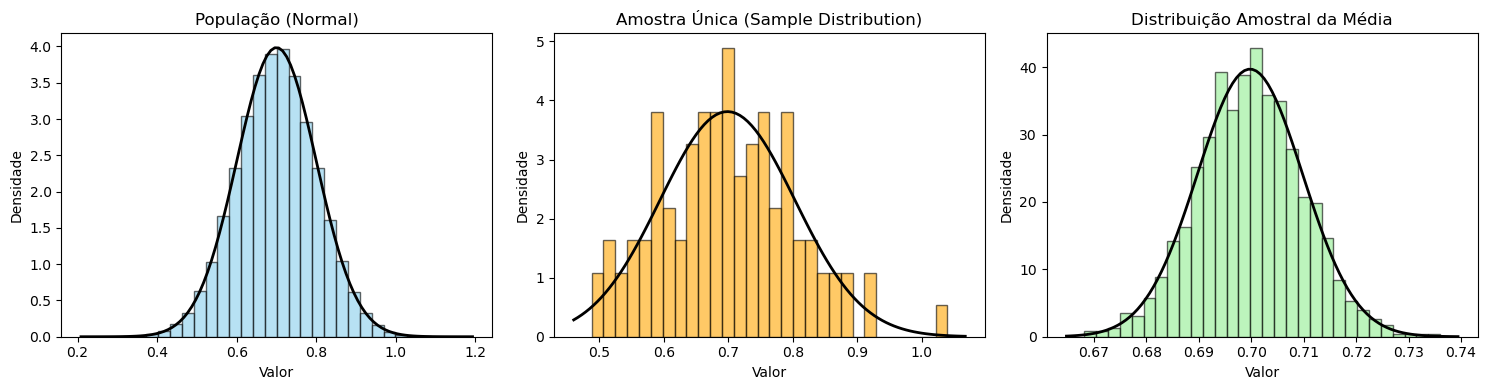

In [66]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plot_hist(populacao, "População (Normal)", 'skyblue')

plt.subplot(1, 3, 2)
plot_hist(amostra, "Amostra Única (Sample Distribution)", 'orange')

plt.subplot(1, 3, 3)
plot_hist(medias_amostras, "Distribuição Amostral da Média", 'lightgreen')

plt.tight_layout()
plt.show()


Qual é a probabilidade de que a qualidade visual média de 100 resultados aleatórios seja maior que 0.71?

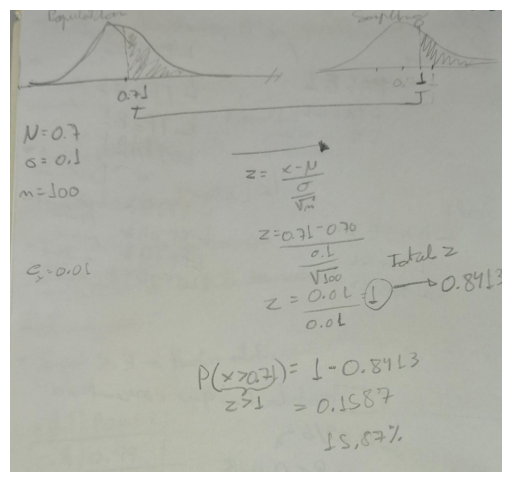

In [68]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Carregar e exibir a imagem
img = mpimg.imread('avaliação de probabilidade.jpeg')  
plt.figure(figsize=(8, 6))  # Ajusta o tamanho do gráfico (opcional)
plt.imshow(img)
plt.axis('off')  # Remove os eixos
plt.show()

In [69]:
mu = 0.7
sigma = 0.1
n = 100
erro_padrao = sigma / np.sqrt(n)

x_barra = 0.71
z = (x_barra - mu) / erro_padrao
p = 1 - norm.cdf(z)

print(f"Z = {z:.2f}")
print(f"P(𝑋̄ > 0.7) = {p:.4f}")


Z = 1.00
P(𝑋̄ > 0.7) = 0.1587


Qual é a proporção de todos os resultados gerados que tem qualidade visual maior que 0.71?

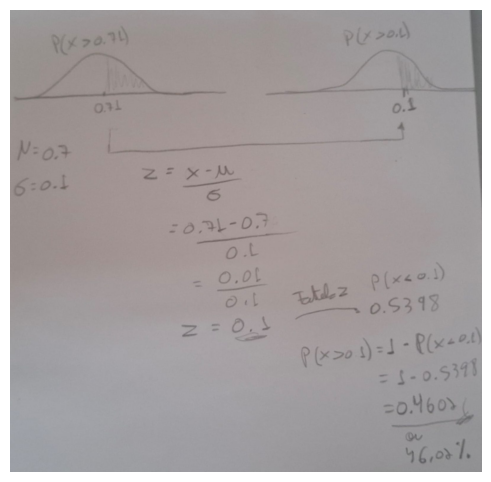

In [71]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Carregar e exibir a imagem
img = mpimg.imread('avaliação probabilidade 2.jpeg')  
plt.figure(figsize=(8, 6))  # Ajusta o tamanho do gráfico (opcional)
plt.imshow(img)
plt.axis('off')  # Remove os eixos
plt.show()

In [72]:
mu = 0.70
sigma = 0.10
x = 0.71

z = (x - mu) / sigma
p = 1 - norm.cdf(z)

print(f"Z = {z:.2f}")
print(f"P(X > 0.85) = {p:.4f}")


Z = 0.10
P(X > 0.85) = 0.4602


# B: TLC

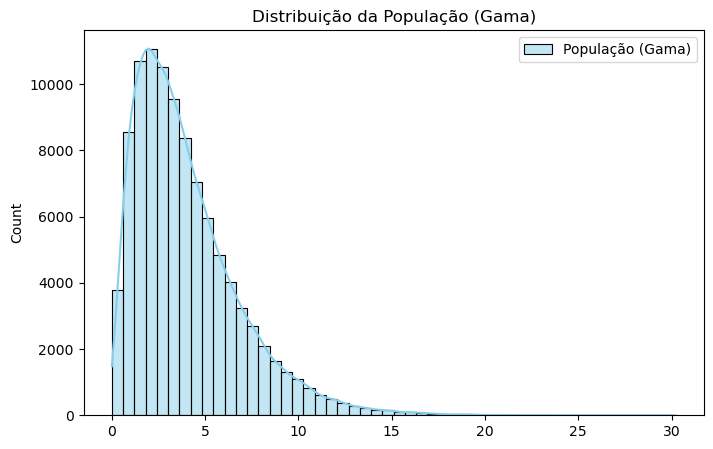

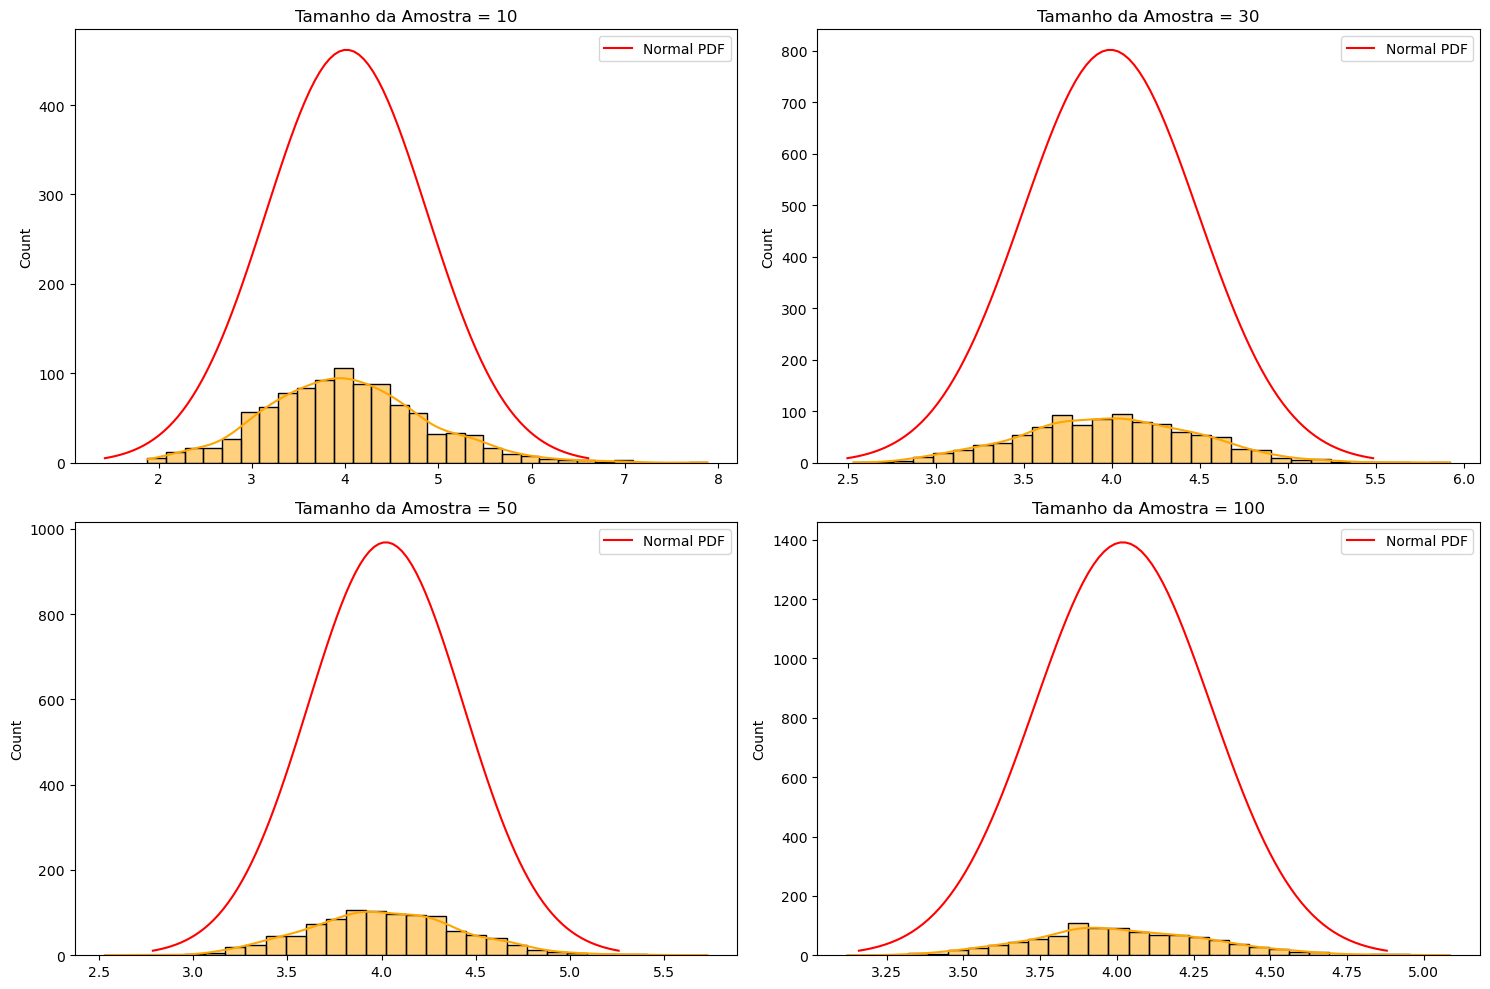

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Geração da população Gama
np.random.seed(42)  # Garante reprodutibilidade dos resultados
# Geração de uma população seguindo a distribuição Gama
population = np.random.gamma(shape=2, scale=2, size=100000)


# 2. Visualização da distribuição real

plt.figure(figsize=(8, 5))
sns.histplot(population, bins=50, kde=True, color="skyblue", label="População (Gama)")
plt.title("Distribuição da População (Gama)")
plt.legend()
plt.show()


# 3. Função que simula o TLC para diferentes tamanhos de amostra

def visualize_clt(sample_sizes, n_samples=1000):
    """
    Gera n_samples amostras para cada tamanho em sample_sizes,
    calcula a média de cada amostra e plota a distribuição dessas médias.
    """
    plt.figure(figsize=(15, 10))

    for i, n in enumerate(sample_sizes, 1):
        # Geração das médias de n_samples amostras com tamanho n
        sample_means = [np.mean(np.random.choice(population, size=n, replace=False)) for _ in range(n_samples)]

        # Subplot correspondente a esse tamanho de amostra
        plt.subplot(2, len(sample_sizes)//2, i)
        sns.histplot(sample_means, bins=30, kde=True, color="orange")

        # Parâmetros da normal teórica com mesma média e desvio das amostras
        mu, sigma = np.mean(sample_means), np.std(sample_means)
        x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
        
        # Curva da normal teórica sobreposta ao histograma
        plt.plot(x, norm.pdf(x, loc=mu, scale=sigma) * n_samples, label="Normal PDF", color="red")

        plt.title(f"Tamanho da Amostra = {n}")
        plt.legend()

    plt.tight_layout()
    plt.show()

sample_sizes = [10, 30, 50, 100]  # Tamanhos de amostra a serem testados
visualize_clt(sample_sizes)       # Executa e plota os resultados

Amostra de tamanho 10 --> distribuição ainda assimétrica, histograma ainda espalhado, a curva normal não se ajusta perfeitamente, amostra é pequena.

Amostra de tamanho 30 e 50 --> A distribuição já é mais simétrica, curva normal se aproxima melhor, principalmente no centro.

Amostra de tamanho 100 --> distribuição de médias aproximada da normal, curva normal e histograma se sobrepõem melhor no centro e nas caudas.

# C: p-value

Probabilidade de 4 caras e 1 coroas: 0.15625
 Probabilidades para cada número de caras:
  0 caras: probabilidade = 0.03125
  1 caras: probabilidade = 0.15625
  2 caras: probabilidade = 0.31250
  3 caras: probabilidade = 0.31250
  4 caras: probabilidade = 0.15625
  5 caras: probabilidade = 0.03125


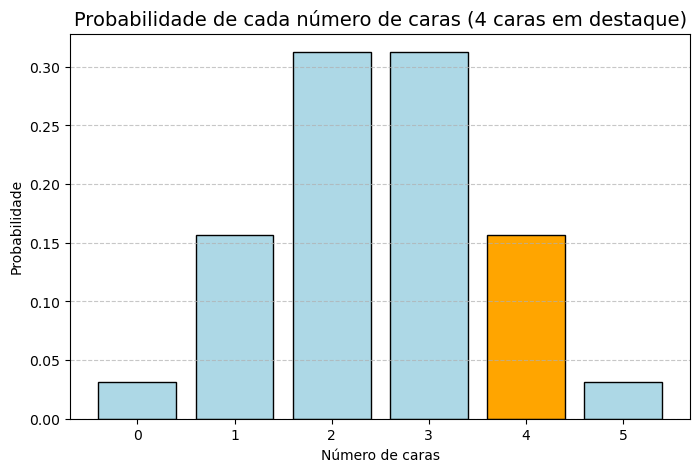


 Eventos tão raros ou mais raros que o observado <= 0.15625
  0 caras: probabilidade = 0.03125
  1 caras: probabilidade = 0.15625
  4 caras: probabilidade = 0.15625
  5 caras: probabilidade = 0.03125


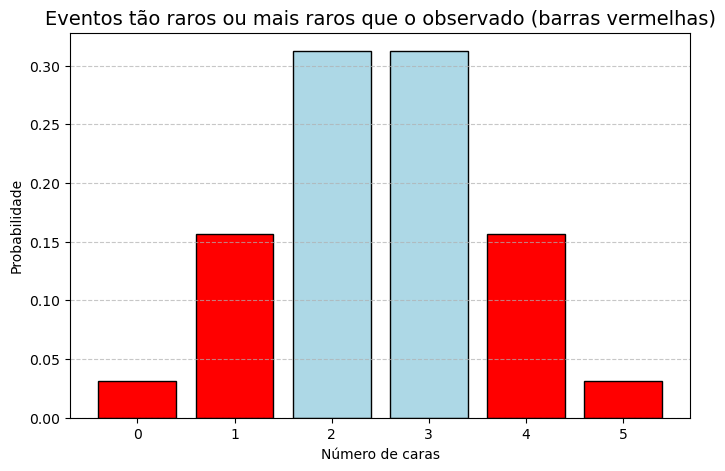


 Somando as probabilidades raras:
  P(0 caras) = 0.03125
+ P(1 caras) = 0.15625
+ P(4 caras) = 0.15625
+ P(5 caras) = 0.03125
------------------------------
P-valor final = 0.37500


In [77]:
import math

# seguindo a formula da distribuição binomial
# Calcula a probabilidade de k sucessos em n tentativas
def binomial_probability(k, n, p):    
    comb = math.comb(n, k)
    return comb * (p ** k) * ((1 - p) ** (n - k))

#  Calcula o p-valor considerando eventos tão raros ou mais extremos
def calcular_p_value(n, p, observado):
    
    # Calcula a probabilidade do evento observado
    prob_observado = binomial_probability(observado, n, p)
    limite = prob_observado 
    print(f"Probabilidade de {observado} caras e {n-observado} coroas: {limite:.5f}")
    
    # Calcular todas as probabilidades possíveis
    k_values = list(range(n + 1))
    probs = []
    
    print(" Probabilidades para cada número de caras:")
    for k in k_values:
        prob = binomial_probability(k, n, p)
        probs.append(prob)
        print(f"  {k} caras: probabilidade = {prob:.5f}")   
    

    # mostrar todas as probabilidades, com destaque na barra observada
    cores_fig1 = []
    for k in k_values:
        if k == observado:
            cores_fig1.append('orange')  # Destacar o número observado
        else:
            cores_fig1.append('lightblue')
    
    plt.figure(figsize=(8,5))
    plt.bar(k_values, probs, color=cores_fig1, edgecolor='black')
    plt.title('Probabilidade de cada número de caras (4 caras em destaque)', fontsize=14)
    plt.xlabel('Número de caras')
    plt.ylabel('Probabilidade')
    plt.xticks(k_values)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
    
    # Pega todos os resultados que têm probabilidade menor ou igual à do evento observado.
    eventos_extremos = []
    for k, prob in zip(k_values, probs):
        if prob <= limite:
            eventos_extremos.append((k, prob))
    
    # imprime os eventos que foram considerados para calcular o p-valor 
    print("\n Eventos tão raros ou mais raros que o observado <=", limite)
    for k, prob in eventos_extremos:
        print(f"  {k} caras: probabilidade = {prob:.5f}")
    
    # mostra eventos tão raros ou mais raros
    cores_fig2 = []
    for prob in probs:
        if prob <= limite:
            cores_fig2.append('red')
        else:
            cores_fig2.append('lightblue')
    
    plt.figure(figsize=(8,5))
    plt.bar(k_values, probs, color=cores_fig2, edgecolor='black')
    plt.title('Eventos tão raros ou mais raros que o observado (barras vermelhas)', fontsize=14)
    plt.xlabel('Número de caras')
    plt.ylabel('Probabilidade')
    plt.xticks(k_values)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
    
    # Somando as probabilidades raras para o p-valor
    print("\n Somando as probabilidades raras:")
    p_value = 0
    for i, (k, prob) in enumerate(eventos_extremos):
        if i == 0:
            print(f"  P({k} caras) = {prob:.5f}")
        else:
            print(f"+ P({k} caras) = {prob:.5f}")
        p_value += prob
    print("-" * 30)
    
    # p-valor final
    print(f"P-valor final = {p_value:.5f}")


# parametro e chamada da função:
n_lancamentos = 5       # 5 jogadas
p_cara = 0.5            # moeda justa
caras_observadas = 4    # 4 caras observadas
calcular_p_value(n_lancamentos, p_cara, caras_observadas)


# D: p-value

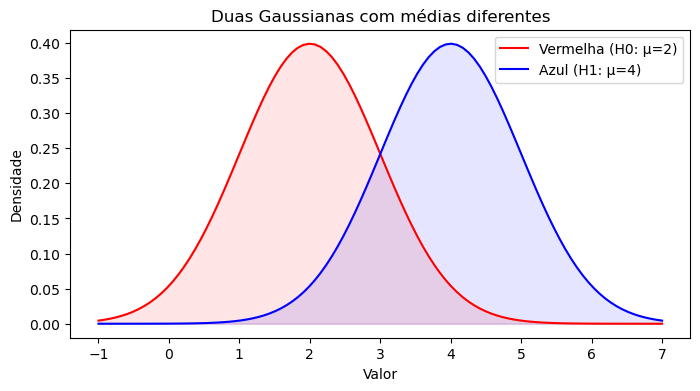

Amostra 1: [4.49671415 3.8617357  4.64768854], p-valor = 0.0105
Amostra 2: [5.52302986 3.76584663 3.76586304], p-valor = 0.0568
Amostra 3: [5.57921282 4.76743473 3.53052561], p-valor = 0.0478
Amostra 4: [4.54256004 3.53658231 3.53427025], p-valor = 0.0307
Amostra 5: [4.24196227 2.08671976 2.27508217], p-valor = 0.3350
Amostra 6: [3.43771247 2.98716888 4.31424733], p-valor = 0.0558
Amostra 7: [3.09197592 2.5876963  5.46564877], p-valor = 0.1929
Amostra 8: [3.7742237  4.0675282  2.57525181], p-valor = 0.0842
Amostra 9: [3.45561728 4.11092259 2.84900642], p-valor = 0.0562
Amostra 10: [4.37569802 3.39936131 3.70830625], p-valor = 0.0240
Amostra 11: [3.39829339 5.85227818 3.98650278], p-valor = 0.0825
Amostra 12: [2.94228907 4.82254491 2.77915635], p-valor = 0.1471
Amostra 13: [4.2088636  2.04032988 2.67181395], p-valor = 0.2697
Amostra 14: [4.19686124 4.73846658 4.17136828], p-valor = 0.0060
Amostra 15: [3.88435172 3.6988963  2.52147801], p-valor = 0.0851
Amostra 16: [3.28015579 3.53936123

In [96]:
import numpy as np
from scipy import stats

# Definindo parâmetros
mu_red = 2    # média da vermelha (nula)
mu_blue = 4   # média da azul (alternativa)
std = 1 # desvio padrão 

# Criando um eixo x que cobre ambas as distribuições com ±3σ
min_mu = min(mu_red, mu_blue)
max_mu = max(mu_red, mu_blue)
x = np.linspace(min_mu - 3*std, max_mu + 3*std, 100)

# Densidades das gaussianas (PDFs)
red_pdf = stats.norm.pdf(x, mu_red, std)
blue_pdf = stats.norm.pdf(x, mu_blue, std)

# Plotando os gráficos
plt.figure(figsize=(8, 4))
plt.plot(x, red_pdf, color='red', label= f"Vermelha (H0: μ={mu_red})")
plt.plot(x, blue_pdf, color='blue', label= f"Azul (H1: μ={mu_blue})")
plt.fill_between(x, red_pdf, alpha=0.1, color='red')
plt.fill_between(x, blue_pdf, alpha=0.1, color='blue')
plt.title("Duas Gaussianas com médias diferentes")
plt.xlabel("Valor")
plt.ylabel("Densidade")
plt.legend()
plt.show()



# Número de repetições
n_samples = 100
n_points = 3  # Número de pontos por amostra

# Sorteando 100 sequências de 3 valores da azul
np.random.seed(42)
samples_blue = np.random.normal(mu_blue, std, (n_samples, n_points))

# Testando cada sequência contra a vermelha
false_negatives = 0
results = []

for i, sample in enumerate(samples_blue, start=1):
    # Teste t: comparação com média da vermelha
    t_stat, p_value = stats.ttest_1samp(sample, popmean=mu_red)
    
    if p_value > 0.05:
        false_negatives += 1

    results.append((i, sample, p_value))

# Calculando a taxa de falsos negativos
false_negative_rate = false_negatives / n_samples

# Exibindo os resultados
for idx, sample, p_value in results:
    print(f"Amostra {idx}: {sample}, p-valor = {p_value:.4f}")

print(f"\nTaxa de falsos negativos: {false_negative_rate:.2f} ou {false_negative_rate*100}%")
